In [29]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
#from sklearn import datasets
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score 
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv(r'C:\Users\Kasper van Eck\Desktop\Data Science Practicing\Datasets\churn-in-telecoms-dataset\churn_in_telecoms.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [3]:
data.head()
data.columns = data.columns.str.strip().str.replace(' ','_')
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
print(data.area_code.nunique())
data['area_code'] = data['area_code'].astype('object')

3


In [30]:
df_numeric = data.select_dtypes(include = np.number)
outliers = df_numeric[(np.abs(stats.zscore(df_numeric)) > 3).all(axis=1)] # axis 1 = elementwise, 0 = by column
outliers.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls


0.14491449144914492


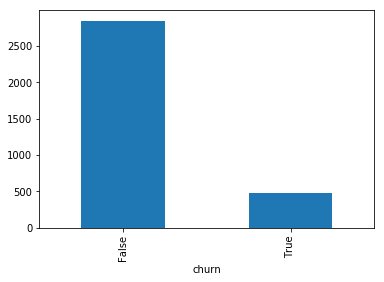

In [33]:
# Churners
print(data.churn.sum()/data.churn.count())

data.groupby('churn')['churn'].size().plot(kind = 'bar')
plt.show()

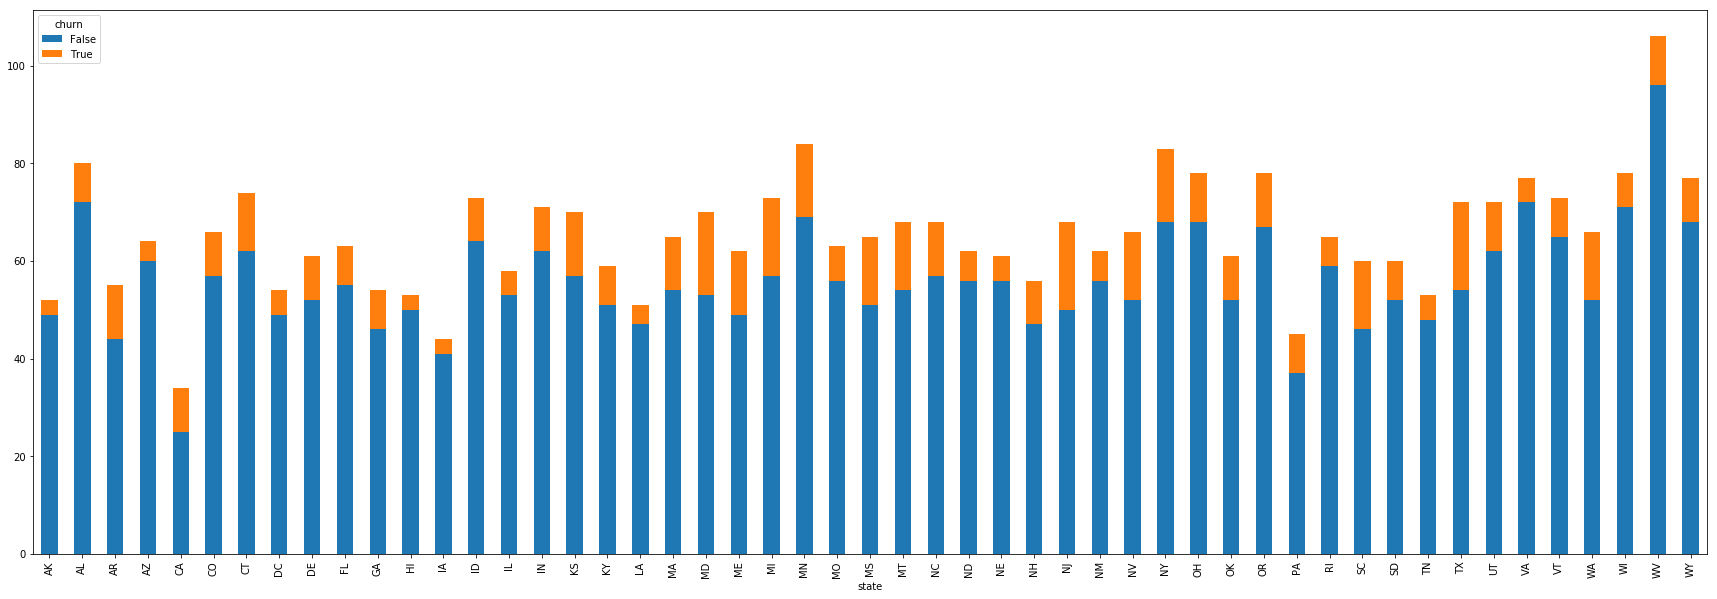

In [32]:
data.groupby(['state', 'churn']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (30,10))
plt.show()

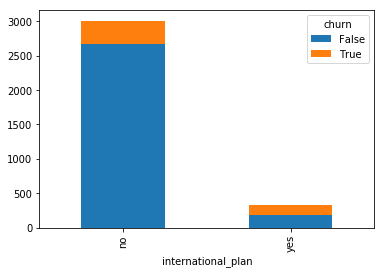

In [34]:
data.groupby(['international_plan', 'churn']).size().unstack().plot(kind = 'bar', stacked = True)

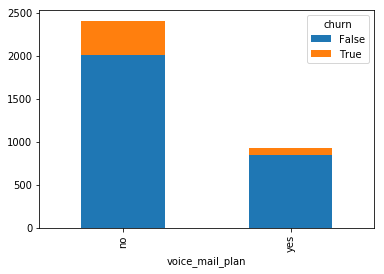

In [35]:
data.groupby(['voice_mail_plan', 'churn']).size().unstack().plot(kind = 'bar', stacked = True)

In [79]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account_length            3333 non-null int64
area_code                 3333 non-null object
phone_number              3333 non-null object
international_plan        3333 non-null object
voice_mail_plan           3333 non-null object
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float6

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


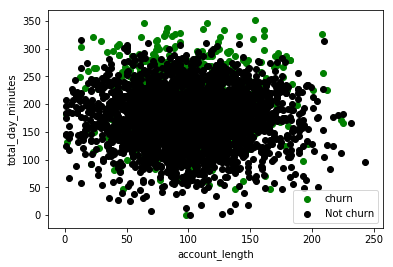

In [67]:
plt.scatter(x=data.account_length[data.churn==1], y=data.total_day_minutes[(data.churn==1)], c="green")
plt.scatter(x=data.account_length[data.churn==0], y=data.total_day_minutes[(data.churn==0)], c = 'black')
plt.legend(["churn", "Not churn"])
plt.xlabel("account_length")
plt.ylabel("total_day_minutes")
plt.show()

## Preparing the dataset for modelling

### Removing correlated features

In [39]:
# Take the numerical features of the original dataset (i.e. don't take the OHE ones)
df_numeric = data.select_dtypes(include = np.number)

def corr_drop(corr_m, factor):
    """
    Drop correlated features maintaining the most relevant.
    
    Parameters
    ----------
    corr_m : pandas.DataFrame
        Correlation matrix
    factor : float
        Min correlation level   
    
    Returns
    ----------
    pandas.DataFrame
        Correlation matrix only with most relevant features
    """
    global cm
    cm = corr_m
    # Get correlation score, as high as this score, more chances to be dropped.
    cum_corr = cm.applymap(abs).sum()
    def remove_corr():
        global cm
        for col in cm.columns:
            for ind in cm.index:
                if (ind in cm.columns) and (col in cm.index):
                    # Compare if are high correlated.
                    if (cm.loc[ind,col] > factor) and (ind!=col):
                        cum = cum_corr[[ind,col]].sort_values(ascending=False)
                        cm.drop(cum.index[0], axis=0, inplace=True)
                        cm.drop(cum.index[0], axis=1, inplace=True)
                        # Do recursion until the last high correlated.
                        remove_corr()
        return cm
    return remove_corr()

chosen_features_num = corr_drop(df_numeric.corr(method='pearson'), 0.80).columns

In [40]:
# Number of features to drop
len(df_numeric.columns)-len(chosen_features_num)

chosen_features_num

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'customer_service_calls'],
      dtype='object')

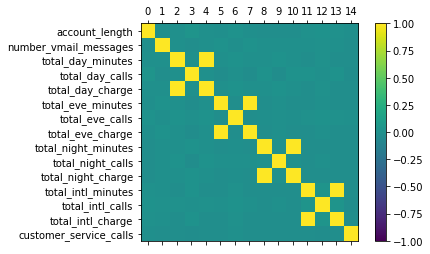

In [54]:
correlation_df = df_numeric.corr()

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_df, vmin=-1, vmax=1)  #matshow is similar to heatmap in seaborn
fig.colorbar(cax)
ticks = np.arange(0,len(df_numeric.columns),1) # start = 0, stop = len(columns), steps = 1
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(df_numeric.columns)
plt.show()

In [52]:
correlation_df[abs(correlation_df) > 0.8]

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
account_length,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_vmail_messages,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_day_minutes,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_day_calls,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_day_charge,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_eve_minutes,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_eve_calls,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_eve_charge,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_night_minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.999999,NaN,NaN,NaN,NaN
total_night_calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


### One hot encoding categoricals

In [55]:
data_cat = data.drop(columns = 'phone_number').select_dtypes(include = 'object')
data_enc = pd.get_dummies(data_cat, drop_first = True)
data_enc.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,international_plan_yes,voice_mail_plan_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### Join the categorical and numerical columns

In [56]:
data_proc = pd.concat([data[chosen_features_num], data_enc], axis =1)
data_proc.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,international_plan_yes,voice_mail_plan_yes
0,128,25,265.1,110,197.4,99,91,11.01,10.0,3,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,195.5,103,103,11.45,13.7,3,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,121.2,110,104,7.32,12.2,5,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,61.9,88,89,8.86,6.6,7,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,148.3,122,121,8.41,10.1,3,...,0,0,0,0,0,0,1,0,1,0


## Train & Test data

### Scaling data: mostly to increase the learning speed

In [48]:
from sklearn.preprocessing import scale

data_proc.loc[:,['account_length', 'number_vmail_messages', 'total_day_minutes',
               'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
               'total_night_calls', 'total_night_charge', 'total_intl_minutes',
               'total_intl_calls', 'customer_service_calls']] = (
                            scale(data_proc.loc[:,['account_length', 'number_vmail_messages', 'total_day_minutes',
                                                   'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
                                                   'total_night_calls', 'total_night_charge', 'total_intl_minutes',
                                                   'total_intl_calls', 'customer_service_calls']]))



C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


In [57]:
X = data_proc.copy()
Y = data.churn.astype('int16')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21, stratify=Y)

# Remove the state columns
X_nostate = data_proc.loc[:, ~data_proc.columns.str.startswith('state')]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21, stratify=Y)
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, Y, test_size=0.2, random_state=21, stratify=Y)

## KNN algorithm

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('training set: ' + str(round(knn.score(X_train, y_train),2)))
print('test set: ' + str(round(knn.score(X_test, y_test),2)))

training set: 0.89
test set: 0.88


In [89]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred) # Predicted = columns, Actuals = rows
cm # 567 TNs, 22 TPs, 3 FPs, 75 FNs

pd.crosstab(y_test, y_pred) # Vrij slecht dus: ik voorspel maar 22 churners correct, 75 mis ik!

col_0,0,1
churn,,
0,567,3
1,75,22


## KNN CV for parameters

In [95]:
param_grid = {'n_neighbors': np.arange(1, 15)} # trying 1 to 15(excl) neighbours

knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

0.8810952738184546

In [96]:
knn_cv.best_params_
knn_cv.best_score_

0.8810952738184546

In [105]:
y_pred = knn_cv.predict(X_test)
print('training set: ' + str(round(knn_cv.score(X_train, y_train),2)))
print('test set: ' + str(round(knn_cv.score(y_test, y_pred),2)))



training set: 0.89


ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## KNN without states

## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

## With states

In [105]:
logreg.fit(X_train, y_train)
y_train_pred_prob = logreg.predict_proba(X_train)[:,1]
AUC_train = roc_auc_score(y_train, y_train_pred_prob)

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
AUC_test = roc_auc_score(y_test, y_pred_prob)

C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


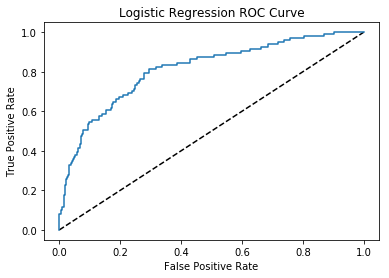

In [106]:
%matplotlib inline
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [111]:
print('test set: ' str(round(AUC_train, 2))
print('test set: ' str(round(AUC_test, 2))

0.8354513226070357

In [119]:
feat_importances = pd.DataFrame({"name":X_train.columns,"coef":logreg.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['exp'] = np.exp(feat_importances['coef'])
feat_importances = feat_importances.loc[feat_importances.exp != 1,:]
feat_importances.sort_values(by="exp",inplace=True,ascending=False)
feat_importances


,name,coef,exp
63,international_plan_yes,2.035111,7.653100
50,state_SC,0.835670,2.306358
36,state_MT,0.793476,2.211069
14,state_CA,0.667128,1.948633
53,state_TX,0.649818,1.915193
32,state_MI,0.557580,1.746442
43,state_NV,0.547111,1.728253
41,state_NJ,0.497928,1.645309
33,state_MN,0.486077,1.625925
10,customer_service_calls,0.460200,1.584390


In [126]:
cv_scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring = 'roc_auc')
print(cv_scores)

C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.79824561 0.81103326 0.74194008 0.82786512 0.78987241]


C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Without states

In [125]:
logreg.fit(X_train_ns, y_train_ns)
y_train_pred_prob = logreg.predict_proba(X_train_ns)[:,1]
AUC_train = roc_auc_score(y_train_ns, y_train_pred_prob)

y_pred_prob = logreg.predict_proba(X_test_ns)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_ns, y_pred_prob)
AUC_test = roc_auc_score(y_test_ns, y_pred_prob)

print(AUC_test, AUC_train)

0.8123892204738651 0.8354513226070357


C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Logistic Regression CV

In [85]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

logreg_cv = GridSearchCV(logreg, param_grid, cv = 3, scoring = 'roc_auc')
logreg_cv.fit(X_train, y_train)

C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kasper van Eck\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [86]:
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression AUC: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l1'}
Tuned Logistic Regression AUC: 0.7964070513823296


In [89]:
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.8301431740270214

In [146]:
feat_importances = pd.DataFrame({"name":X_train.columns,"coef":logreg_cv.best_estimator_.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['exp'] = np.exp(feat_importances['coef'])
feat_importances = feat_importances.loc[feat_importances.exp != 1,:]
feat_importances.sort_values(by="exp",inplace=True,ascending=False)
feat_importances


# intercept
np.exp(logreg_cv.best_estimator_.intercept_)


array([0.11947045])

In [147]:
#help(logreg_cv)
print(y_test.sum()/y_test.count())
print(y_train.sum()/y_train.count())

0.1454272863568216
0.1447861965491373


# Random Forest Classifier

In [ ]:
def stratified_cv(X, Y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(Y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold: 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [122]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))


Test set accuracy: 0.936, OOB accuracy: 0.950


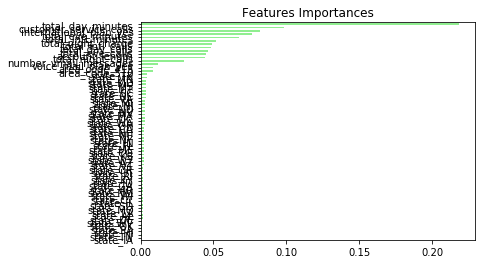

0.9987046632124352
0.7885512750949539


In [136]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Instantiate rf
rf = RandomForestClassifier(n_estimators=50,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

y_train_pred_prob = rf.predict(X_train)

print(roc_auc_score(y_train, y_train_pred_prob))

In [174]:
Max_depth = np.arange(1,10,1)


Max_features = np.arange(1, int(np.sqrt(len(X.columns))), 1)
param_grid = {'max_depth': Max_depth, 'max_features': Max_features}

rf = RandomForestClassifier(n_estimators=50, random_state=2)

rfc_cv = GridSearchCV(rf, param_grid, cv = 5, scoring = 'roc_auc')

rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([1, 2, 3, 4, 5, 6, 7])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [175]:
print("Tuned RF Parameter: {}".format(rfc_cv.best_params_))
print("Tuned RF AUC: {}".format(rfc_cv.best_score_))

Tuned RF Parameter: {'max_depth': 9, 'max_features': 7}
Tuned RF AUC: 0.9033636529367369


In [178]:
y_pred = rfc_cv.predict(X_test)

print(roc_auc_score(y_test, y_pred))

0.5970609513474407


In [ ]:
# Predict the test set labels
y_pred = rf.predict(X_test)


# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()


print(roc_auc_score(y_test, y_pred))